# Classification of Iris By interperting Through Pair Plot

In [3]:
from sklearn import datasets
import pandas as pd
import numpy as np
#import seaborn as sn
import matplotlib.pyplot as plt
#sn.set()
Iris=datasets.load_iris()
df=pd.DataFrame(Iris['data'],columns=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width'])

In [5]:
df['output']=Iris['target']

C:\Users\Mani\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Mani\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Mani\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


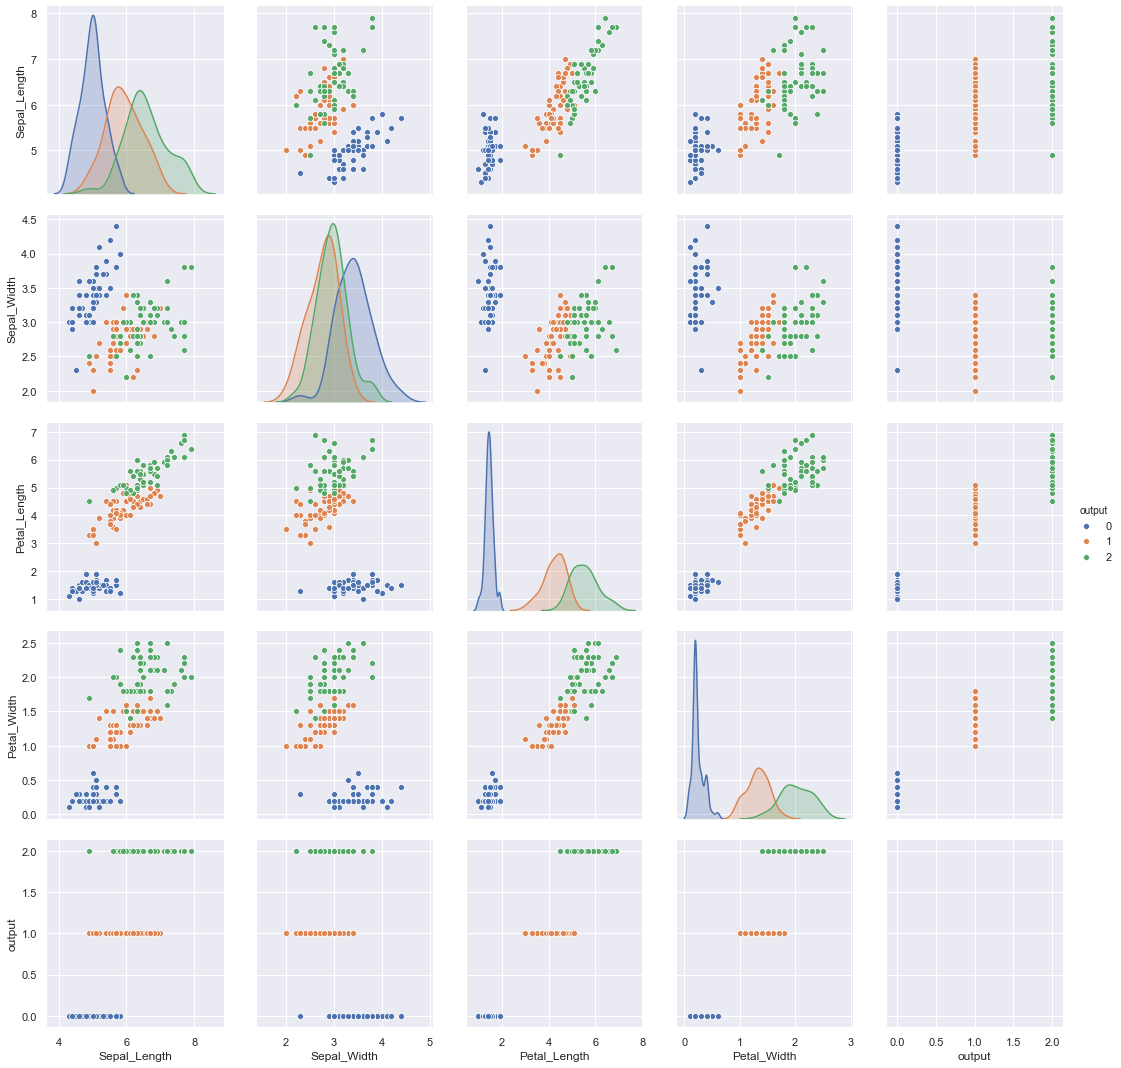

In [2]:
df['output']=Iris['target']
sn.pairplot(df,hue='output',size=3)
plt.show()

# Objective
**If we see the plot of Petal_Length Versus Petal_Width it differntiate the setosa good, Versicolor and Virginica prety good so we are inteded to classify them bases of information dervived from plot between petal_LEngth and Petal_Width**

In [6]:
from sklearn.model_selection import train_test_split
x=df.drop(columns=['Sepal_Length','Sepal_Width','output'])
y=df.output
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [7]:
x_test.index

Int64Index([114,  62,  33, 107,   7, 100,  40,  86,  76,  71, 134,  51,  73,
             54,  63,  37,  78,  90,  45,  16, 121,  66,  24,   8, 126,  22,
             44,  97,  93,  26],
           dtype='int64')

In [8]:
lis=[]
for i in range(len(x_train.index)):
    if x_train.iloc[i,0]<=2 and x_train.iloc[i,1]<=1:
        lis.append(0)
    elif (x_train.iloc[i,0]>2 and x_train.iloc[i,0]<=5) and (x_train.iloc[i,1]>1 and x_train.iloc[i,1]<=2):
        lis.append(1)
    else:
        lis.append(2)

In [9]:
li=[]
for i in range(len(x_test.index)):
    if x_test.iloc[i,0]<=2 and x_test.iloc[i,1]<=1:
        li.append(0)
    elif (x_test.iloc[i,0]>2 and x_test.iloc[i,0]<=5) and (x_test.iloc[i,1]>1 and x_test.iloc[i,1]<=2):
        li.append(1)
    else:
        li.append(2)

In [10]:
from sklearn.metrics import accuracy_score
print('Train Score',accuracy_score(y_train,lis))
print('Test Score',accuracy_score(y_test,li))

Train Score 0.8916666666666667
Test Score 0.8666666666666667


# Model Performance
#**from the infromation derived from pairplot building a model gave me an accuracy for Training it is giving about 89%**
#**for testing data it is giving about 86% accurate**
#**So this model is performing somewhat good for this dataset**
#**but what if a new data is added then the accuracy may go down**

# Classification Of Iris DataSet Using PDF(probability Density Function) and CDF(Cumulative Distribution Function)

In [11]:
# Dividing the dataset into three parts
Iris_Setosa=df[df['output']==0]
Iris_Versicolor=df[df['output']==1]
Iris_Virginca=df[df['output']==2]

In [12]:
counts1,bin_edges1=np.histogram(Iris_Setosa['Petal_Length'],bins=10,density=True)
counts2,bin_edges2=np.histogram(Iris_Versicolor['Petal_Length'],bins=10,density=True)
counts3,bin_edges3=np.histogram(Iris_Virginca['Petal_Length'],bins=10,density=True)

#**Here we are trying to get the occurence of input data that fall with in each bins what acctually np.histogram() does and return bins**

In [13]:
#Here we are trying to find out the pdf of values it is known as finding the probability of occurence of values in the range
pdf_setosa=counts1/sum(counts1)
pdf_versicolor=counts2/sum(counts2)
pdf_virginca=counts3/sum(counts3)

In [14]:
#CDF is a cumulative Distribution Function cumulative summation of PDF is Known as CDF
cdf_setosa=np.cumsum(pdf_setosa)
cdf_versicolor=np.cumsum(pdf_versicolor)
cdf_virginca=np.cumsum(pdf_virginca)

[]

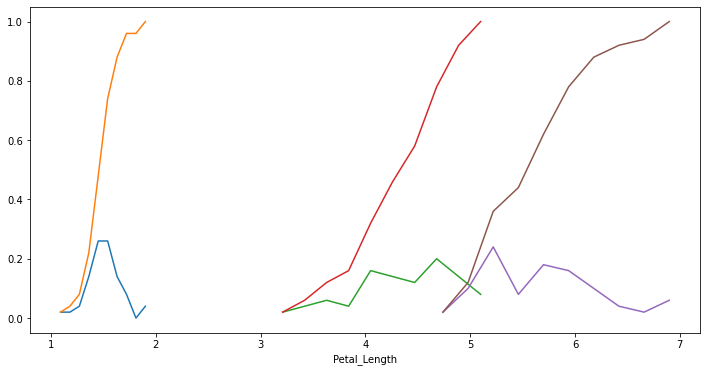

In [15]:
from matplotlib.pyplot import figure
figure(figsize=(12,6))
plt.plot(bin_edges1[1:],pdf_setosa)
plt.plot(bin_edges1[1:],cdf_setosa)
plt.plot(bin_edges2[1:],pdf_versicolor)
plt.plot(bin_edges2[1:],cdf_versicolor)
plt.plot(bin_edges3[1:],pdf_virginca)
plt.plot(bin_edges3[1:],cdf_virginca)
plt.xlabel('Petal_Length')
plt.plot()

[]

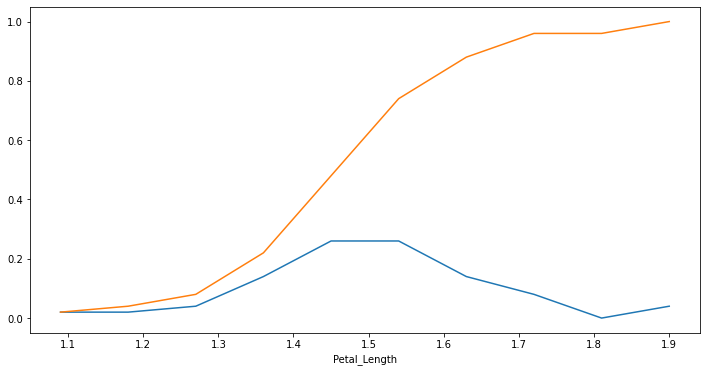

In [16]:
from matplotlib.pyplot import figure
figure(figsize=(12,6))
plt.plot(bin_edges1[1:],pdf_setosa)
plt.plot(bin_edges1[1:],cdf_setosa)
plt.xlabel('Petal_Length')
plt.plot()

# Objective
#**from the above figure we can interpret P_L <=2 is setosa and P_L>2 and P_L<=5 is versicolor P_L>5 is virginca**
#**if i do follow the above logic in building a model then::**
#**1.I can Classify Setosa with 100% accurate because by seeing the PDF and CDF of setosa that it has not overlapped with the other**
#**2.In case of Versicolor That i can Classify them with Accuarcy of 95% or 98% if we see the CDF of Versicolor it has crossed the grid in at 0.95 0r 0.98 on Y label**
#**3.If we see for Virginca  after 0.1 in Y label it is falling beyond 5 but some of the values are in Versicolor from this i can conclude that in classifing Virginca i can get 90 % accurate**

# Interpreting information from mean and standard deviation

In [27]:
setosa_petal_length=Iris_Setosa.Petal_Length
versicolor_petal_length=Iris_Versicolor.Petal_Length
virginca_petal_length=Iris_Virginca.Petal_Length

# Mean

In [28]:
#mean_of_petal_length
print('mean of setosa_petal_length',np.mean(setosa_petal_length))

# when there is an outlier in data points
print('mean of setosa_petal_length when there is an outlier',np.mean(np.append(setosa_petal_length,50)))

print('mean of versicolor_petal_length',np.mean(versicolor_petal_length))
print('mean of virginca_petal_length',np.mean(virginca_petal_length))

mean of setosa_petal_length 1.4620000000000002
mean of setosa_petal_length when there is an outlier 2.4137254901960787
mean of versicolor_petal_length 4.26
mean of virginca_petal_length 5.552


# from the mean of petal length of each flower we come to know that
#1.setosa has very small petal length when compared to versicolor and virginca
#2.versicolor and virginca are similar in petal length still there is little differnce
#3.when there is an outlier in setosa data set mean is out of the bound 

# Standard Deviation

In [29]:
print('Standard deviation of setosa_petal_length',np.std(setosa_petal_length))

#when there is an outlier in data points
print('Standard deviation of setosa_petal_length when there is an outlier',np.std(np.append(setosa_petal_length,50)))

print('Standard deviation of versicolor_petal_length',np.std(versicolor_petal_length))
print('Standard devation of virginca_petal_length',np.std(virginca_petal_length))

Standard deviation of setosa_petal_length 0.17191858538273286
Standard deviation of setosa_petal_length when there is an outlier 6.731868010072429
Standard deviation of versicolor_petal_length 0.4651881339845204
Standard devation of virginca_petal_length 0.5463478745268441


# from Standard Deviation of petal length of each flowers we come to know that

#1.for setosa flower spreadness is less in petal length
#2.for versicolor and virginca spreadness is more compared to setosa
#3.when there is an outlier in data points Standard Deviation is beyond the boundry

# Calculating Median value of the flowers

In [30]:
print('Median value of the setosa_peatl_length flower is',np.median(setosa_petal_length))

#when there is an outlier
print('Median value of the setosa_petal_length flower when there is an outlier',np.median(np.append(setosa_petal_length,50)))

print('Median value of the veriscolor_petal_length flower is',np.median(versicolor_petal_length))
print('Median value of the virginca_petal_length flower is',np.median(virginca_petal_length))

Median value of the setosa_peatl_length flower is 1.5
Median value of the setosa_petal_length flower when there is an outlier 1.5
Median value of the veriscolor_petal_length flower is 4.35
Median value of the virginca_petal_length flower is 5.55


# From median values of petal length of flowers we can interpret
#**Mean and Median of the petal length flower almost similar**
#**When there is an outlier in data points mean doesnt deveiated a good property of median when compared to mean and std**
#**MEdian can be corupted when 50% or more then 50% of data points are corupted**

# Percentiles and Quantiles of Iris Data

In [31]:
print('\n n percentails')
print('n percentails of setosa flower is',np.percentile(setosa_petal_length,np.arange(0,100,25)))
print('n percetaile of versicolor flower is',np.percentile(versicolor_petal_length,np.arange(0,100,25)))
print('n percentile of virginca flower is',np.percentile(virginca_petal_length,np.arange(0,100,25)))
print('\n')
print('\n 90 th percentiles')
print('90 th percentile of setosa flower is',np.percentile(setosa_petal_length,90))
print('90 th percentile of versicolor flower is',np.percentile(versicolor_petal_length,90))
print('90 th percentile of virginca flower is',np.percentile(virginca_petal_length,90))


 n percentails
n percentails of setosa flower is [1.    1.4   1.5   1.575]
n percetaile of versicolor flower is [3.   4.   4.35 4.6 ]
n percentile of virginca flower is [4.5   5.1   5.55  5.875]



 90 th percentiles
90 th percentile of setosa flower is 1.7
90 th percentile of versicolor flower is 4.8
90 th percentile of virginca flower is 6.3100000000000005


# Conclusion from Percentiles and Quantiles
#**n percentiles describes that in setosa_petal_length 25% values are less than 1.4 and 75% values are greater than 1.4**
#**in setosa_petal_length 50% values are lesser than 1.5 and 50% values are greater than 1.5**
#**likewise 75% values are less than 1.575 and 25% are greater than 1.575 in setosa petal length**
#**simlar infromation is described for versicolor and virginca petal_length**
#**in 90 the percentile 90% values are less than 1.7 and 10 are greater than 1.7**

# Box plots and whiskers


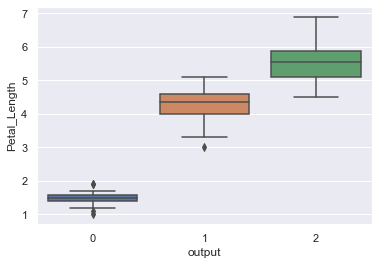

In [27]:
sn.boxplot(x='output',y='Petal_Length',data=df)
plt.show()

# Box Plots suggest that
#**quartile of the data points**
#**from the figure  i can conclude that if i keep condition as IF P_L >=5 then versicolor but first 25 percentiles of virginca collide with versicolor it means that from the above condition im going to get accuarcy 25 % less**

# Violin Plots

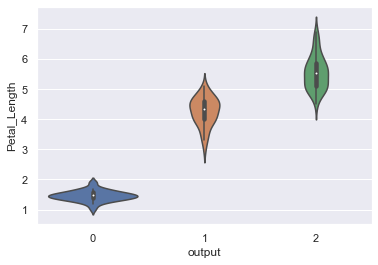

In [31]:
sn.violinplot(x='output',y='Petal_Length',data=df,size=8)
plt.show()

# Violin Plots
#**violin plots is combination of histogram or kde with Boxplots it gives infromation about percentiles as well as distribution and spreadness of datapoints**

# Multivariate Probability Density(Or) Countour Plot(joint plot)

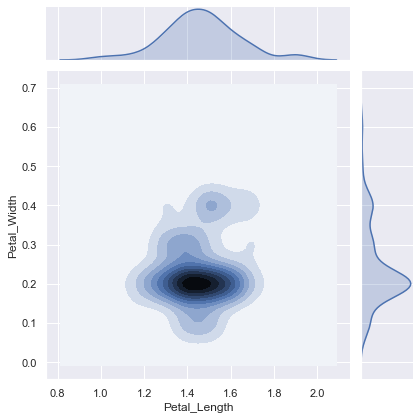

In [36]:
sn.jointplot(x='Petal_Length',y='Petal_Width',kind='kde',data=Iris_Setosa)
plt.show()

# From Joint plot we can conclude that::
#**It mainly suggest that how points are distributed for Two Dimensional(Petal_Length,Petal_Width) Data Points**
#**From the plot we can see that most of the data Points lie in range of(1.3 to 1.5) and (0.17 to 0.24) of Petal_Length and Petal_Width respectively**
#**By seeing Plot in some area color is dark and in other area the color is ligth color means it gives Entropy of availablity of points**

In [16]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
std_data=std.fit_transform(df.drop(columns=['output']))


array([-0.90068117, -1.14301691, -1.38535265, -1.50652052, -1.02184904,
       -0.53717756, -1.50652052, -1.02184904, -1.74885626, -1.14301691,
       -0.53717756, -1.26418478, -1.26418478, -1.87002413, -0.05250608,
       -0.17367395, -0.53717756, -0.90068117, -0.17367395, -0.90068117,
       -0.53717756, -0.90068117, -1.50652052, -0.90068117, -1.26418478,
       -1.02184904, -1.02184904, -0.7795133 , -0.7795133 , -1.38535265,
       -1.26418478, -0.53717756, -0.7795133 , -0.41600969, -1.14301691,
       -1.02184904, -0.41600969, -1.14301691, -1.74885626, -0.90068117,
       -1.02184904, -1.62768839, -1.74885626, -1.02184904, -0.90068117,
       -1.26418478, -0.90068117, -1.50652052, -0.65834543, -1.02184904,
        1.40150837,  0.67450115,  1.2803405 , -0.41600969,  0.79566902,
       -0.17367395,  0.55333328, -1.14301691,  0.91683689, -0.7795133 ,
       -1.02184904,  0.06866179,  0.18982966,  0.31099753, -0.29484182,
        1.03800476, -0.29484182, -0.05250608,  0.4321654 , -0.29